Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release (update once every 45 days on average), and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [1]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

     |████████████████████████████████| 161 kB 4.1 MB/s 
     |████████████████████████████████| 235 kB 44.1 MB/s 
     |████████████████████████████████| 365 kB 38.2 MB/s 
     |████████████████████████████████| 123 kB 48.9 MB/s 
     |████████████████████████████████| 88 kB 7.5 MB/s 
     |████████████████████████████████| 60.3 MB 37 kB/s 
     |████████████████████████████████| 6.4 MB 16.5 MB/s 
     |████████████████████████████████| 854 kB 46.7 MB/s 
     |████████████████████████████████| 3.1 MB 46.7 MB/s 
     |████████████████████████████████| 2.0 MB 40.6 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 
     |████████████████████████████████| 88 kB 8.4 MB/s 
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20810 sha256=b33654ef6e64373bb4be6bd58e8b005ee632267fcc9a63fa4028c0dfabb4f848
  Stored in directory: /root/.cache/pip/wheels/ae/cd/13/09fe660e3e9d392c7e9b46f202369cd9c2b8dddfb47d5950ef
  Created wheel for cairocffi: filename=cairocf

## From source

Before being staged for a stable release, we constantly iterate on the community feedback to improve the library. Bug fixes and performance improvements are regularly pushed to the project Git repository. Using this installation method, you will access all the latest features that have not yet made their way to a pypi release!

In [2]:
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[tf]
# PyTorch
!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

Obtaining python-doctr[torch] from git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]
  Cloning https://github.com/mindee/doctr.git to ./src/python-doctr
  Running command git clone -q https://github.com/mindee/doctr.git /content/src/python-doctr
  Attempting uninstall: python-doctr
    Found existing installation: python-doctr 0.4.0
    Uninstalling python-doctr-0.4.0:
      Successfully uninstalled python-doctr-0.4.0
  Running setup.py develop for python-doctr


Now go to  `Runtime/Restart runtime` for your changes to take effect!

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [3]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,202 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-freefont-ttf all 20120503-7 [4,202 kB]
Fetched 4,202 kB in 0s (13.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading database ... 15

Let's take care of all the imports directly

In [1]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [2]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/101971449 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [3]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear')
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): Ba

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.



```
# Tiene formato de código
```

##Añadir Imagen Mediante Captura de imagen

Añadimos la imagen aqui para obtener la predicción 


In [4]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
  

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Método Webcam tiempo real

Importar paquetes 

In [5]:
# import dependencies

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Running on Webcam Video

In [6]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [7]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

set()
[]
El medicamento es: None


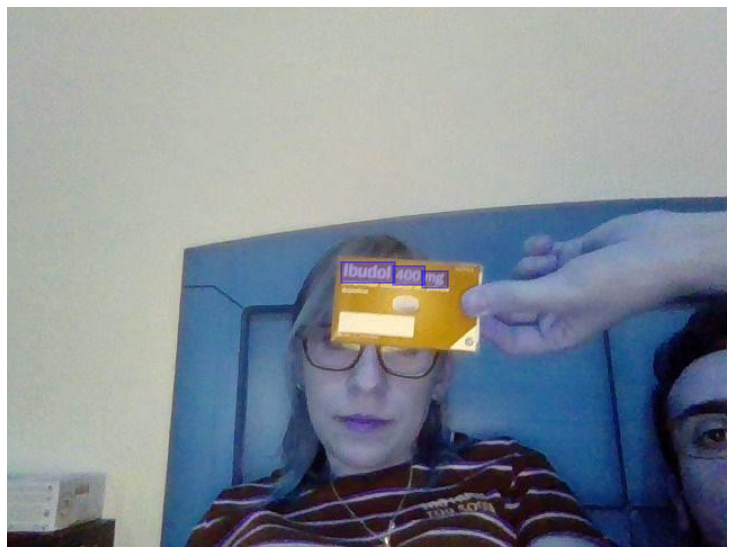

set()
[]
El medicamento es: None


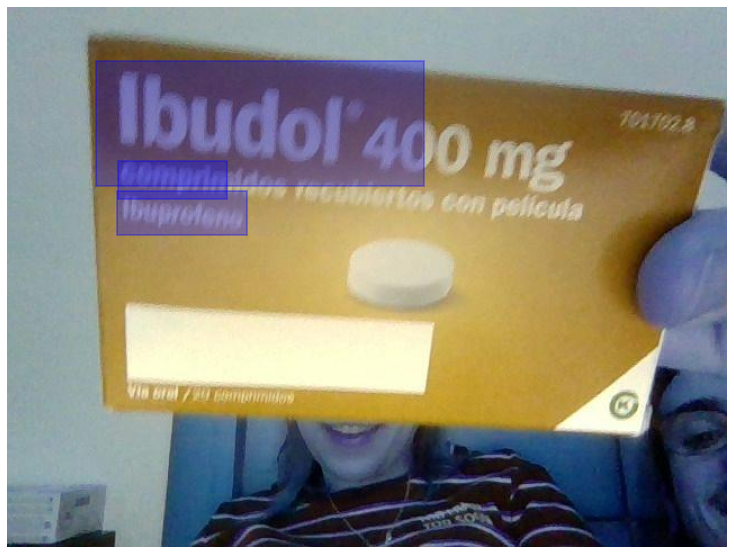

set()
[]
El medicamento es: None


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


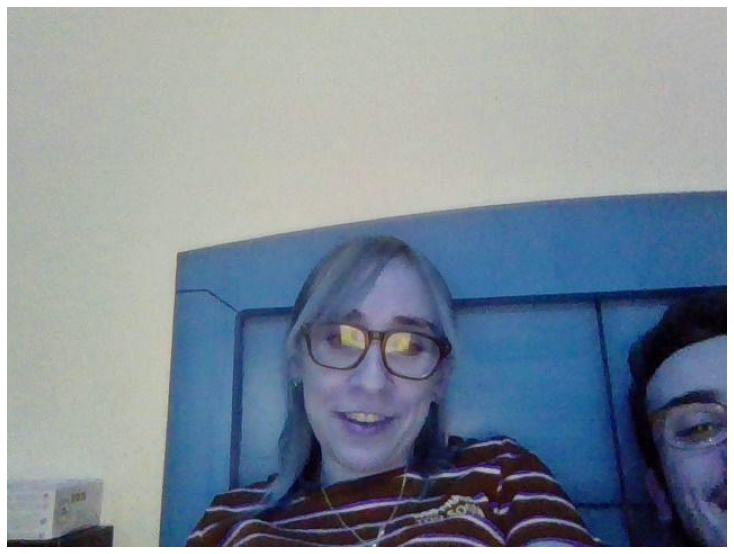

set()
[]
El medicamento es: None


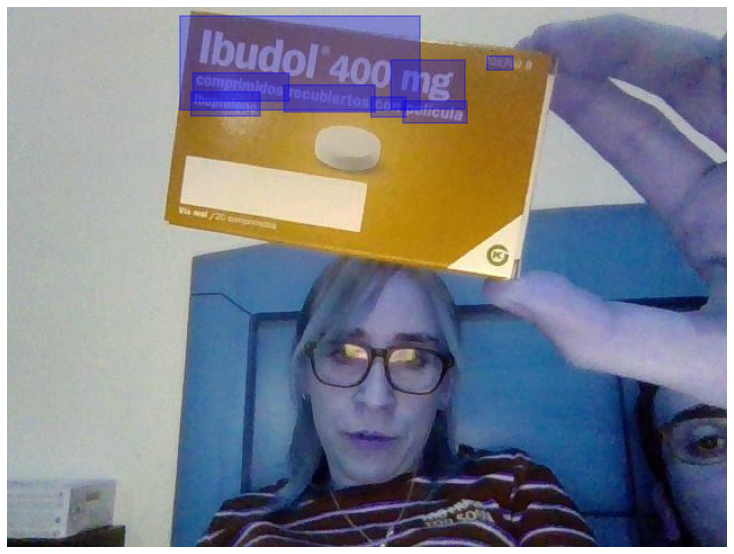

set()
[]
El medicamento es: None


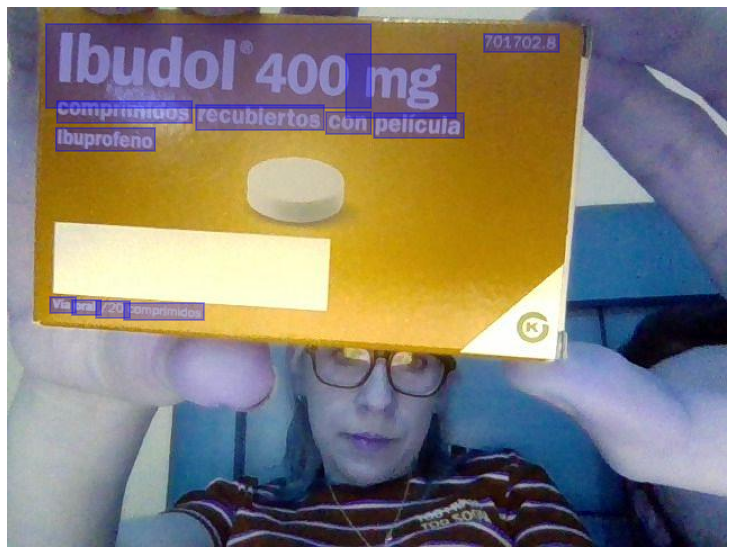

{'Ibuprofeno'}
El medicamento es: {'Ibuprofeno'}


In [13]:
import matplotlib
lista_json = []
labels = ["Acetaminofen", "Aspirina", "Calcio", "Clortalidona","Diazepam", "Diclofenaco", "Dipirona",
          "Dolalgial","Enalapril","Espirolactona", "Furosemida","Hidroclotiazida","Ibuprofeno","Indometacina",
          "Levotiroxina","Losartan","Lovastatina", "Mask","Mascarilla" "Metoprolol","Naproxeno", "Nifedipina", 
          "Omeprazol", "Paracetamol","Phenergan","Vaselina" "Vitaminas"]

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox) 
    print(set(lista_json).intersection(set(labels)))
    if not js_reply or set(lista_json).intersection(set(labels)):
        print("El medicamento es: "+ str(set(lista_json).intersection(set(labels))))
        eval_js('shutdown=true')
        video_frame(label_html, bbox)
        break
    else:
      match=check_matches(labels, lista_json)
      print("El medicamento es: "+ str(match))
    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    
    matplotlib.image.imsave('frame_temp.jpg', frame)
    #
    document = DocumentFile.from_images("frame_temp.jpg")
    result = predictor(document)
    result.show(document)

    # JSON export
    json_export = result.export()
    #print(json_export)

    for i in range(len(json_export ["pages"][0]["blocks"])):
      for j in range(len(json_export ["pages"][0]["blocks"][i]["lines"][0]["words"])):
        lista_json.append(json_export ["pages"][0]["blocks"][i]["lines"][0]["words"][j]["value"])
        
    
    
        


In [ ]:
print(lista_json)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

In [ ]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [ ]:
"""
# JSON export
json_export = result.export()
print(json_export)
"""

In [ ]:
#json_export

In [ ]:
# XML export
#xml_output = result.export_as_xml()
#print(xml_output[0][0])

Para averiguar si encuentra un match exacto

In [ ]:
"""
lista_json = []
labels = ["Acetaminofen", "Aspirina", "Calcio", "Clortalidona","Diazepam", "Diclofenaco", "Dipirona",
          "Dolalgial","Enalapril","Espirolactona", "Furosemida","Hidroclotiazida","Ibuprofeno","Indometacina",
          "Levotiroxina","Losartan","Lovastatina", "Mask","Mascarilla" "Metoprolol","Naproxeno", "Nifedipina", 
          "Omeprazol", "Paracetamol","Phenergan","Vaselina" "Vitaminas"]

for i in range(len(json_export ["pages"][0]["blocks"])):
  for j in range(len(json_export ["pages"][0]["blocks"][i]["lines"][0]["words"])):
    #print(j)
    #print(json_export ["pages"][0]["blocks"][i]["lines"][0]["words"][j]["value"])
    lista_json.append(json_export ["pages"][0]["blocks"][i]["lines"][0]["words"][j]["value"])
    
print(set(lista_json).intersection(set(labels)))
"""

# **Implementar distancia de Levenshtein**

In [10]:
def check_matches(labels, lista_json):
  lista_matches=[]

  for label in labels:
    for string in lista_json:
      if label and string:
        matches = levenshtein_ratio_and_distance(label, string, ratio_calc = True), label, string
        if matches[0] > 0.80:
          lista_matches.append(matches)
          break
  print(lista_matches)


match=check_matches(labels, lista_json)
print(match)

[]
None


In [ ]:

lista_matches=[]
for label in labels:
  for string in lista_json:
    if label and string:
      #print(label,string)
      print(levenshtein_ratio_and_distance(label, string, ratio_calc = True), label, string)
      matches = levenshtein_ratio_and_distance(label, string, ratio_calc = True), label, string
      lista_matches.append(matches)

print(lista_matches)


In [ ]:
for i in range(len(lista_matches)):
  if lista_matches[i][0] is None:
    continue
  else:
    if lista_matches[i][0] > 0.90:
      print(lista_matches[i])

In [12]:
import numpy as np
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])